### JOB ROLE PREDICTION USING RESUME

#### GOAL :- The goal is to predict the most suitable job role based on a candidate's resume.

### Part -1 Analysis :

### 1. Import Necessary Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings("ignore")
import joblib

### 2. Import Data

In [16]:
# Load Dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### 3. Data Understanding

In [19]:
df.shape

(962, 2)

In [21]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [23]:
df.duplicated().sum()

796

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [27]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

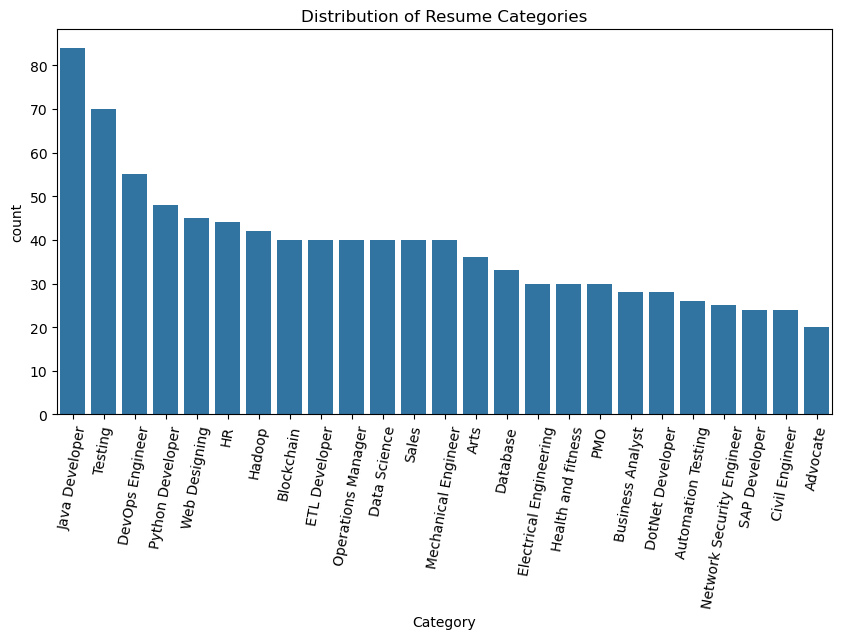

In [29]:
# Check category distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=80)
plt.title("Distribution of Resume Categories")
plt.show()

In [30]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

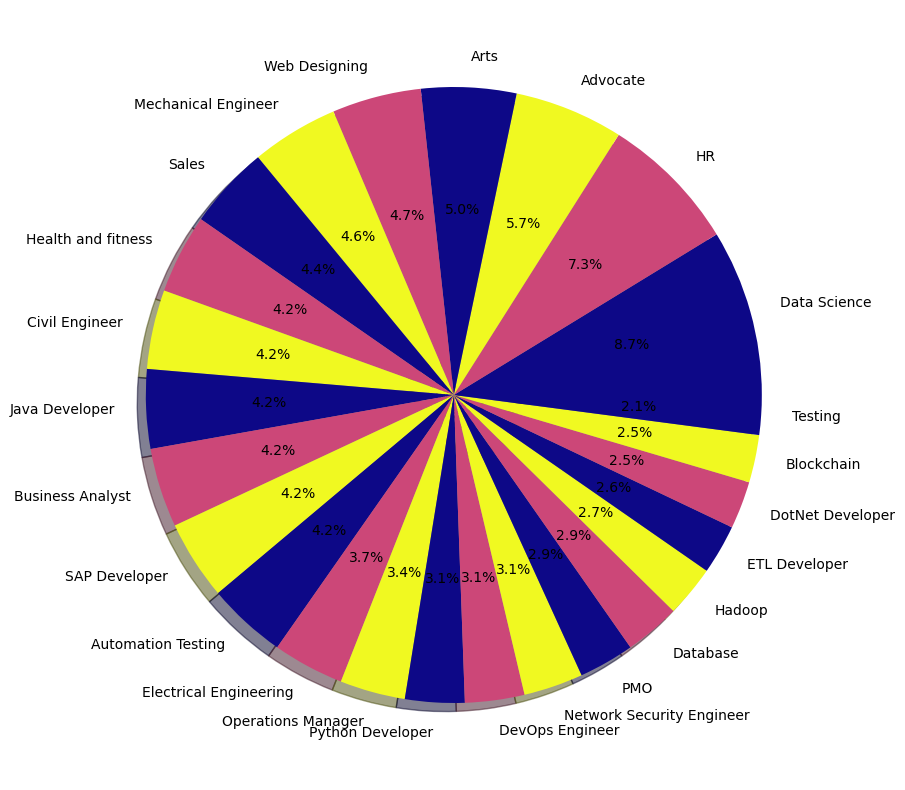

In [33]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

### 4. Data Balancing

In [36]:
max_count = int(df['Category'].value_counts().max())

In [38]:
r_balanced = pd.concat([
    df[df['Category'] == cls].sample(max_count, replace=True, random_state=42) 
    for cls in df['Category'].unique()
])

# Shuffle the dataset
r_balanced = r_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("Balanced Class Distribution:\n", r_balanced['Category'].value_counts())

Balanced Class Distribution:
 Category
Automation Testing           84
Hadoop                       84
Java Developer               84
ETL Developer                84
HR                           84
Web Designing                84
Civil Engineer               84
Arts                         84
Advocate                     84
Electrical Engineering       84
Network Security Engineer    84
Business Analyst             84
Blockchain                   84
Operations Manager           84
Mechanical Engineer          84
PMO                          84
Database                     84
DevOps Engineer              84
Sales                        84
SAP Developer                84
DotNet Developer             84
Health and fitness           84
Python Developer             84
Data Science                 84
Testing                      84
Name: count, dtype: int64


### Conclusion:

From the data we came to know that
- There are some dupluicate values in the dataset
- There are no null values
- This is text based data so we can apply NLP to this data set
- balancing the category data

### Part -2 Data Preprocessing:

In [43]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
df['Category'][0]

'Data Science'

In [47]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [49]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

In [51]:
df['Resume'] = df['Resume'].apply(clean_text)
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run analytics gener

In [52]:
r_balanced

,Category,Resume
0,Automation Testing,* Excellent grasping power in learning new con...
1,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Python Developer,Technical Skills: Languages Python Python Fram...
4,Health and fitness,SKILLS: Computer: â¢ Can easily operate in Op...
...,...,...
2095,Database,"SKILLSET Oracle DBA, MySQL, MARIADB, PostgreSQ..."
2096,Electrical Engineering,Education Details \r\nJanuary 2012 to January ...
2097,Electrical Engineering,Education Details \r\n\r\nElectrical engineeri...
2098,Python Developer,Training attended: 1. Successfully completed E...


In [53]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(r_balanced['Resume']).toarray()
y = r_balanced['Category']

In [54]:
X

array([[0.05827317, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01380768],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0671603 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
y

0           Automation Testing
1           Operations Manager
2                 Data Science
3             Python Developer
4           Health and fitness
                 ...          
2095                  Database
2096    Electrical Engineering
2097    Electrical Engineering
2098          Python Developer
2099          Business Analyst
Name: Category, Length: 2100, dtype: object

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=13)

### Logistic Regression

In [64]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred=log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9976190476190476


### Define hyperparameter grids

In [58]:
param_grids = {
        "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

### Print all best parameters together

In [61]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
best_params = {}
best_models = {}
for name, model in models.items():
    print(f"Training {name} with GridSearchCV...\n" + "-"*50)

    # Apply GridSearchCV for models with hyperparameters
    grid_search = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Store the best model and its parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

Training Random Forest with GridSearchCV...
--------------------------------------------------
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training K-Nearest Neighbors with GridSearchCV...
--------------------------------------------------
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Training Support Vector Machine with GridSearchCV...
--------------------------------------------------
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Training Decision Tree with GridSearchCV...
--------------------------------------------------
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [65]:
print("\n🔹 Best Hyperparameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


🔹 Best Hyperparameters for Each Model:
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Decision Tree: {'max_depth': 20, 'min_samples_split': 2}


### RandomForestClassifier

#### n_estimators: Specifies the number of trees in the forest. More trees improve accuracy but increase computation time.
#### max_depth: Sets the maximum depth of each tree. A deeper tree captures more patterns but may overfit.
#### min_samples_split: Determines the minimum number of samples required to split a node. A higher value prevents overfitting by forcing the tree to generalize more.

In [70]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=10, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150,
                       random_state=42)

In [72]:
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### KNN

#### n_neighbors: Defines the number of neighbors to consider when classifying a new data point. A lower value increases variance, while a higher value increases bias.
#### metric: Specifies the distance measurement used to find the nearest neighbors:
#### euclidean: Measures straight-line distance.
#### manhattan: Measures distance by summing absolute differences.
#### minkowski: A generalized form that can behave like both Euclidean and Manhattan distances.
#### p: Defines the power parameter for Minkowski distance:
#### p=1 → Manhattan distance.
#### p=2 → Euclidean distance.

In [76]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

In [78]:
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### SVM

#### C: Controls the trade-off between margin width and classification accuracy. A smaller C allows more misclassification (simpler model), while a larger C tries to classify all points correctly (risk of overfitting).
#### kernel: Determines how the decision boundary is drawn:
#### linear: Uses a straight-line separation.
#### rbf: Maps data into a higher dimension to allow complex separation.
#### gamma: Controls how much influence a single training example has on the decision boundary:
#### scale: Adjusts automatically based on the dataset.
#### auto: Uses 1/n_features as the default value.

In [82]:
svm = SVC(C=1, kernel='linear', gamma='scale', random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [83]:
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### DecisionTreeClassifier

#### max_depth: Specifies the maximum depth of the tree. A higher depth captures more details but increases the risk of overfitting.
#### min_samples_split: Sets the minimum number of samples required to split a node. Higher values create a more generalized model.

In [88]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [89]:
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8833333333333333


### Conclusion:

#### By inspection of all the ML models RandomForestClassifier, SVM, KNN is giving more accuracy there for building model using SVM

In [94]:
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = clean_text(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = vectorizer.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svm.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = predicted_category

    return predicted_category_name[0]  # Return the category name


In [96]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [98]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)


'Health and fitness'

In [100]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)


'Network Security Engineer'

In [102]:
joblib.dump(svm, "resume_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [104]:
print(f"Vector Type: {type(resume_vector)}")

NameError: name 'resume_vector' is not defined